In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("MediumDataAfterEDA.csv")

In [19]:
df.head(3)

,title,Author,Upvote,CommentCount,Publish Date,Read Time,Paragraph,Links,Tag,Weekday,Month,Year,BlogLength,Consolidated Tag
0,DrivenData Interview,Will Koehrsen,544,2,14 Dec 2020,13,"In October 2020, I was interviewed by DrivenDa...",https://williamkoehrsen.medium.com/drivendata-...,Data Science,Monday,December,2020,15939,Data Science
1,A Data Science Conversation,Will Koehrsen,411,43,10 Mar 2020,3,Talking is a lot like writing in that it force...,https://williamkoehrsen.medium.com/a-data-scie...,Data Science,Tuesday,March,2020,1379,Data Science
2,"12 Lessons from 55,000 pages of books",Will Koehrsen,1400,10,02 Jan 2020,14,Reading 136 books in a year does not get you t...,https://williamkoehrsen.medium.com/12-lessons-...,Personal Development,Thursday,January,2020,20927,Personal Development


# Distribution Visualization

In [20]:
def create_distribution(attribute="Upvote", bins=20, color='skyblue'):
    plt.figure(figsize=(8, 6))
    plt.hist(df[attribute], bins=bins, color=color, alpha=0.7)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(str(attribute))
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

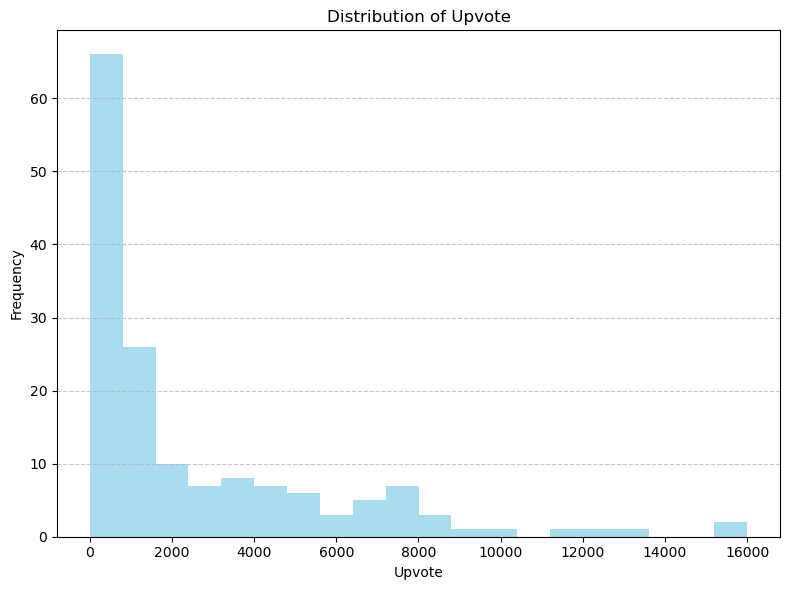

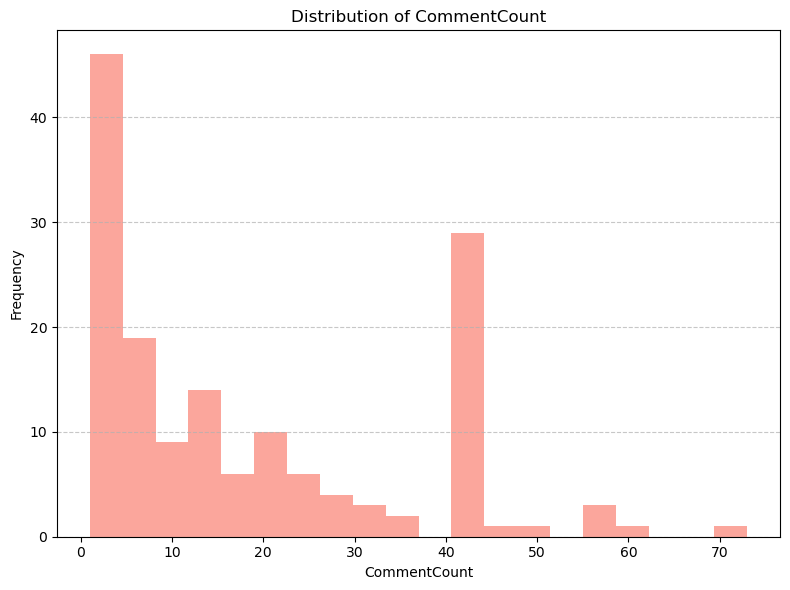

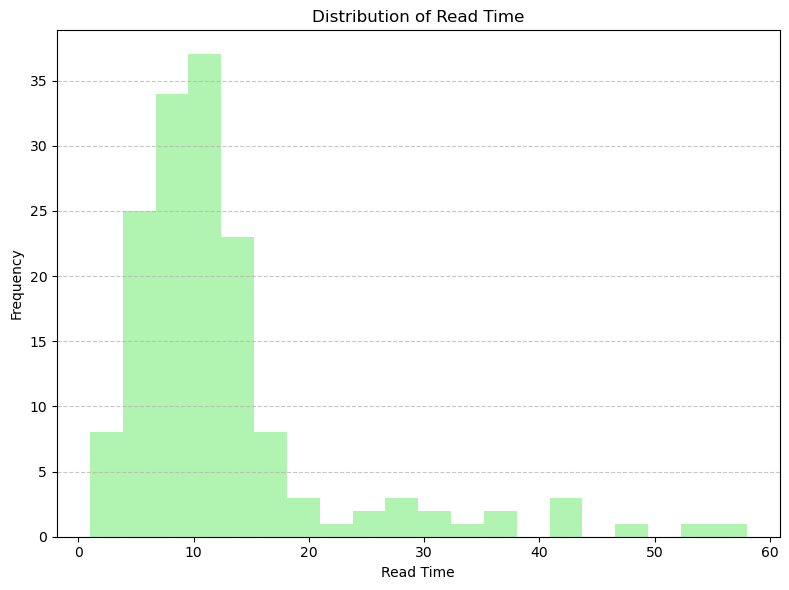

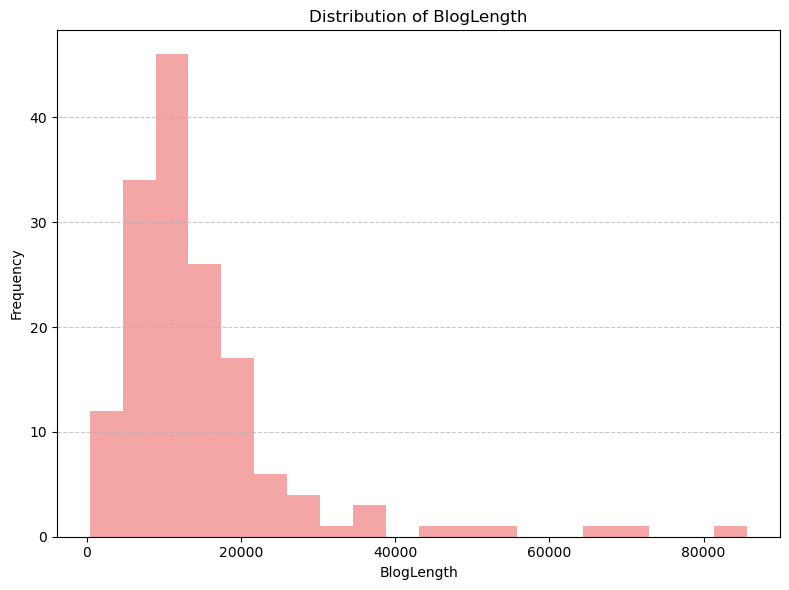

In [21]:
numeric_columns = ["Upvote","CommentCount","Read Time","BlogLength"]
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']
for cols,color in zip(numeric_columns,colors):
    create_distribution(attribute=cols,color=color)

## Data Distribution Summary:

1. **Upvotes Distribution:**
   - Range: 0 to 1000.
   - Observation: Skewed right, indicating that the majority of posts receive a lower number of upvotes.

2. **Comments Count Distribution:**
   - Range: 0 to 10.
   - Observation: Skewed right, suggesting that most posts attract a relatively low number of comments.

3. **Blog Read Time Distribution:**
   - Range: 5 to 14 minutes.
   - Observation: Skewed right, implying that the majority of readers spend a moderate amount of time reading blog posts.

4. **Blog Length Distribution:**
   - Range: 5000 to 15000 words.
   - Observation: Represents a moderate range, indicating variability in blog post lengths but with a significant portion falling within this range.

## Conclusion:
Overall, the data suggests that the majority of posts receive relatively fewer upvotes and comments, while blog read times and lengths vary but are typically within moderate ranges.

# Relationship Visualization

In [22]:
from scipy.stats import pearsonr
def relationship_distribution(x, y, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[y], color=color, alpha=0.7)
    plt.title(f'{x} Vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    correlation_coefficient, p_value = pearsonr(df[x], df[y])
    print("Pearson correlation coefficient:", correlation_coefficient)
    print("p-value:", p_value)

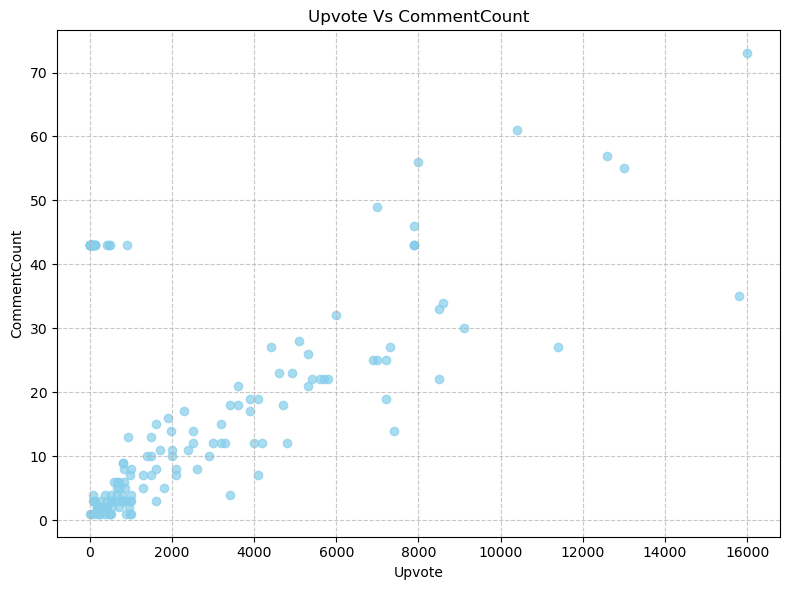

Pearson correlation coefficient: 0.4388177573183883
p-value: 1.1205745810840261e-08


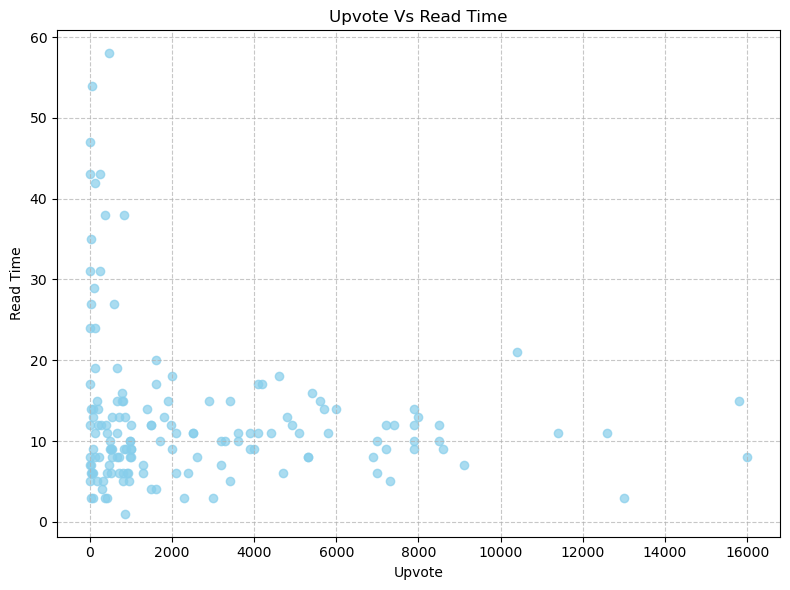

Pearson correlation coefficient: -0.1560480294655993
p-value: 0.052507247688805145


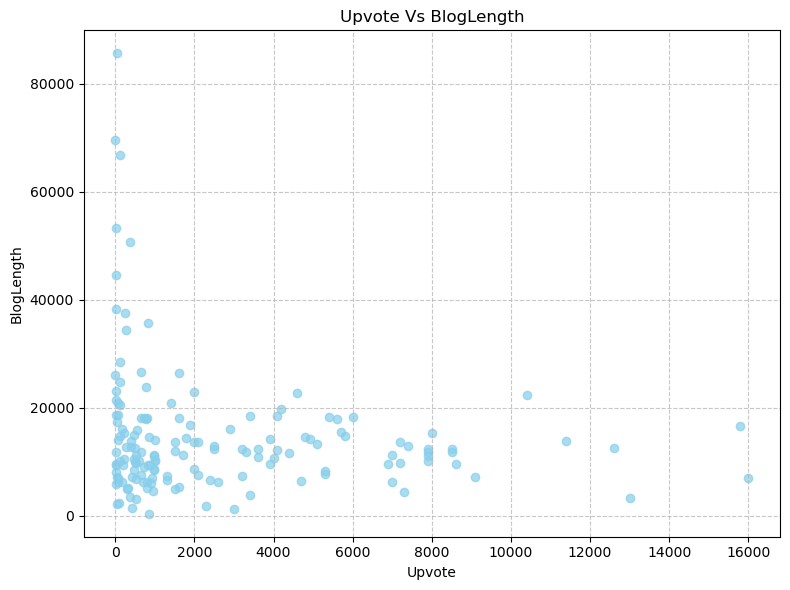

Pearson correlation coefficient: -0.16133237323590013
p-value: 0.04491277037254038


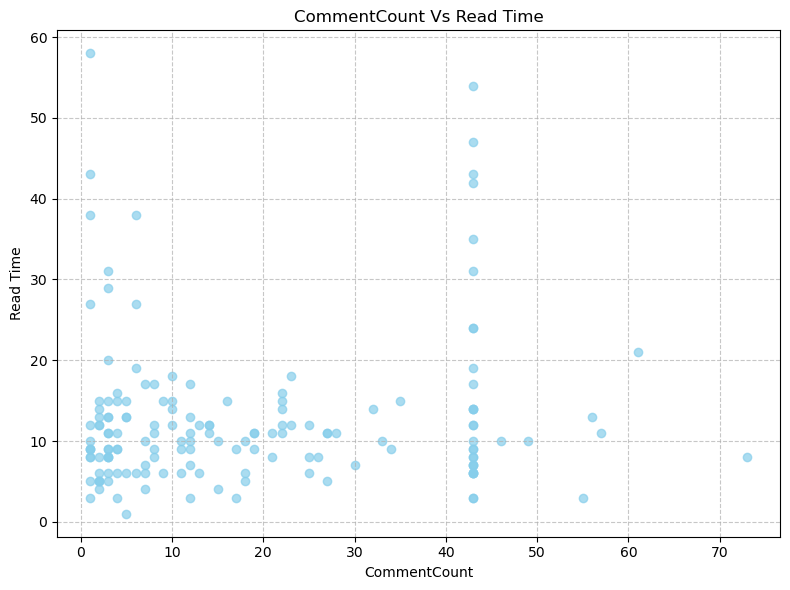

Pearson correlation coefficient: 0.08890433378820779
p-value: 0.2713014318452211


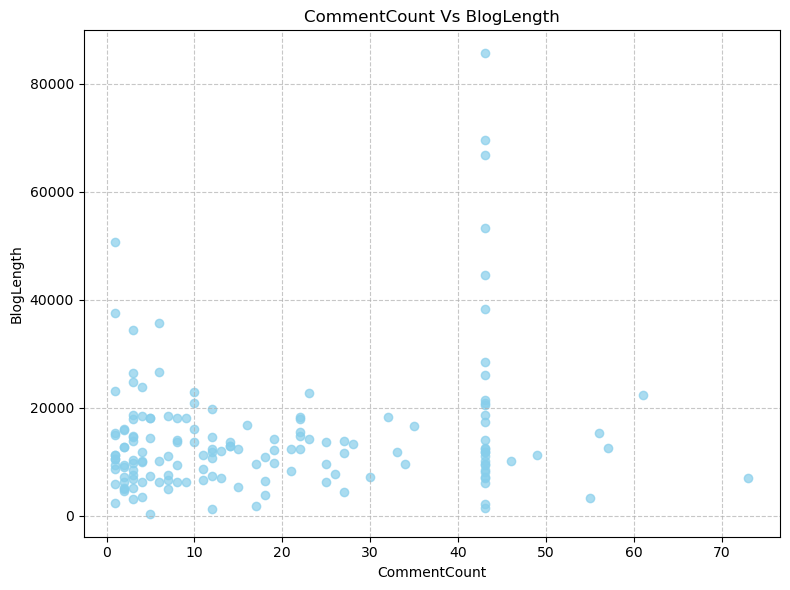

Pearson correlation coefficient: 0.19056296937132558
p-value: 0.017544545809874794


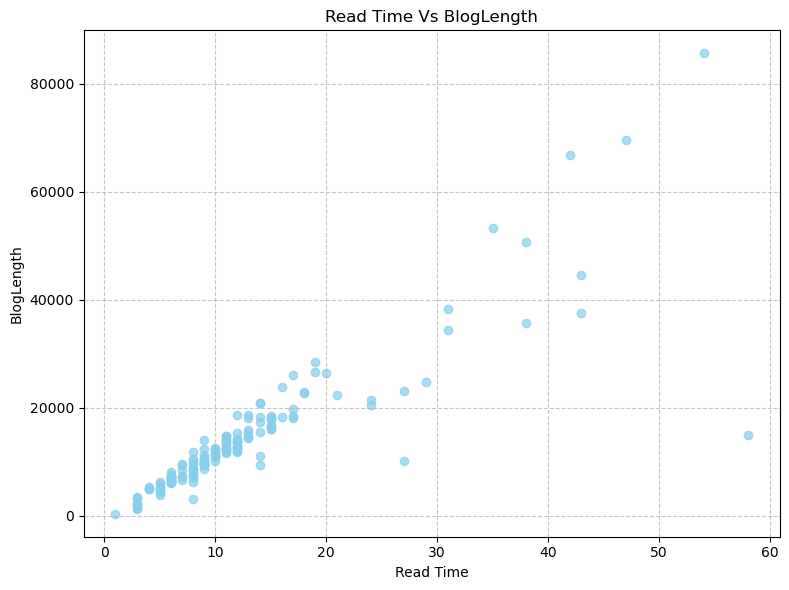

Pearson correlation coefficient: 0.8715074745498276
p-value: 3.3078238714505005e-49


In [23]:
for i in range(len(numeric_columns)):
    for j in range(i+1,len(numeric_columns)):
        relationship_distribution(numeric_columns[i],numeric_columns[j],'skyblue')

These correlation coefficients and p-values provide insights into the relationships between the variables in the dataset. A correlation coefficient close to 1 or -1 indicates a strong correlation, while a p-value less than 0.05 suggests that the correlation is statistically significant.

### Analysis:

1. **Upvote vs. Comment Count**:
   - More Upvote Counts leads to more Comment Count, suggesting that more people who like the blog would like to give their input.

2. **Read Time vs. Blog Length**:
   - More Read Time leads to more Blog Length, which is expected, as the time spent reading will naturally increase with a larger blog.


# Most Famous Blogs

In [24]:
def blog_distribution(attribute, color='lightcoral'):
    df_sorted = df.sort_values(by=attribute, ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted['title'], df_sorted[attribute], color=color)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(str(attribute))
    plt.ylabel('Blog Title')
    plt.tight_layout()
    plt.show()

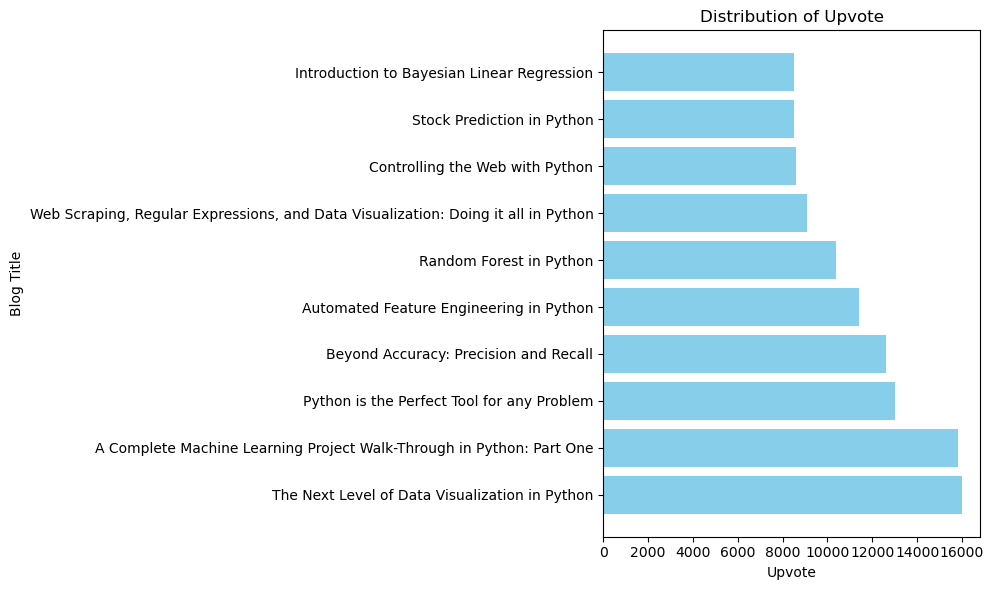

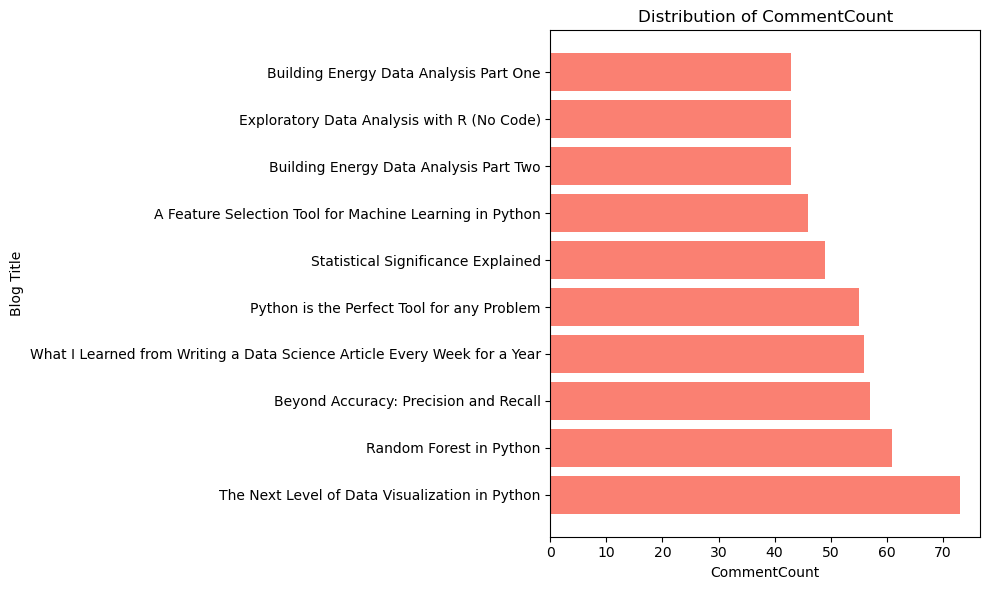

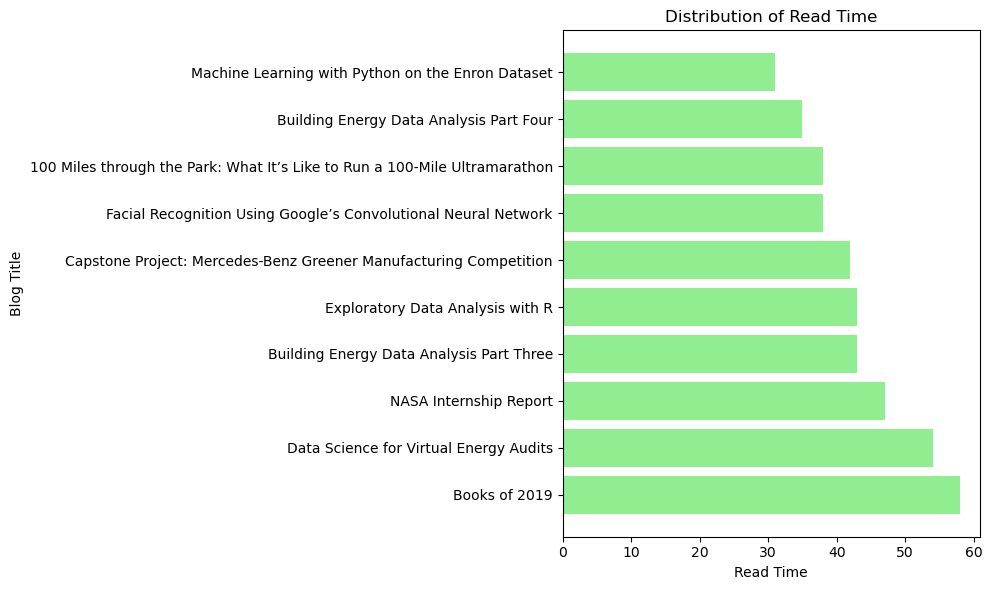

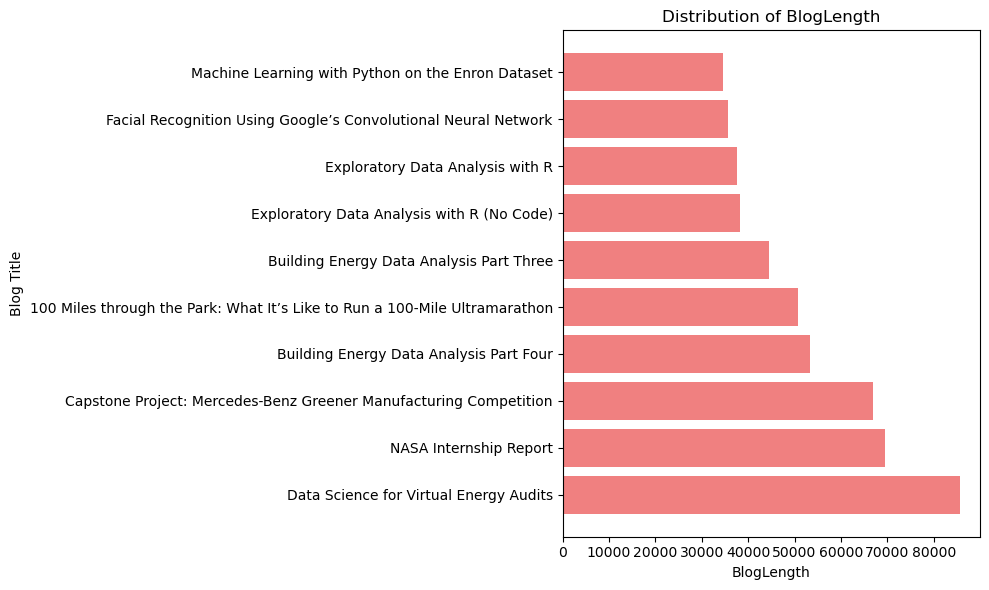

In [25]:
for cols,color in zip(numeric_columns,colors):
    blog_distribution(attribute=cols,color=color)

# Relationship With Publish Date

In [26]:
def distribution_of_time(x, df1):
    plt.figure(figsize=(10, 6))
    plt.bar(df1[x], df1['count'], color='skyblue')
    plt.title(f'Number of Blogs Written Each {x}')
    plt.xlabel(x)
    plt.ylabel('Number of Blogs')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

def relationship_with_time(x, y):
    calculation = df.groupby(x)[y].sum().reset_index()
    heatmap_data = calculation.pivot_table(index=x, columns=x, values=y, fill_value=0)
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
    plt.colorbar(label=y)
    plt.title(f'{y} with {x}')
    plt.xlabel(x)
    plt.ylabel(x)
    plt.xticks(range(len(heatmap_data.index)), heatmap_data.index)
    plt.yticks(range(len(heatmap_data.columns)), heatmap_data.columns)
    plt.tight_layout()
    plt.show()

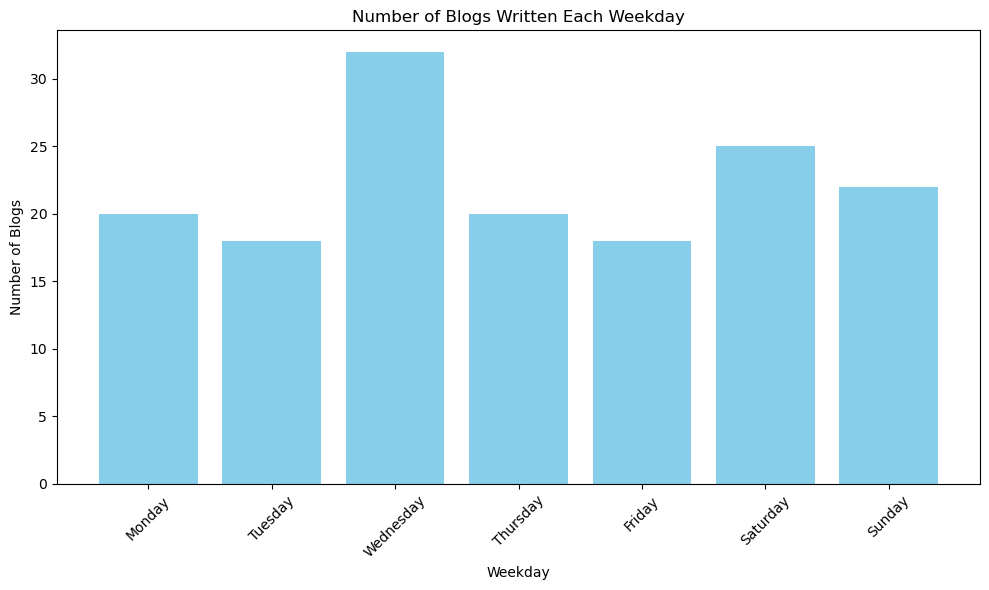

In [27]:
weekday_df = pd.DataFrame(df["Weekday"].value_counts())
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_df = weekday_df.reindex(weekdays).reset_index()
distribution_of_time('Weekday',weekday_df)

- The data reveals that a significant portion of the blogs were written on Wednesdays and Saturdays. This observation could be attributed to various factors, including the author's schedule and commitment to consistency.

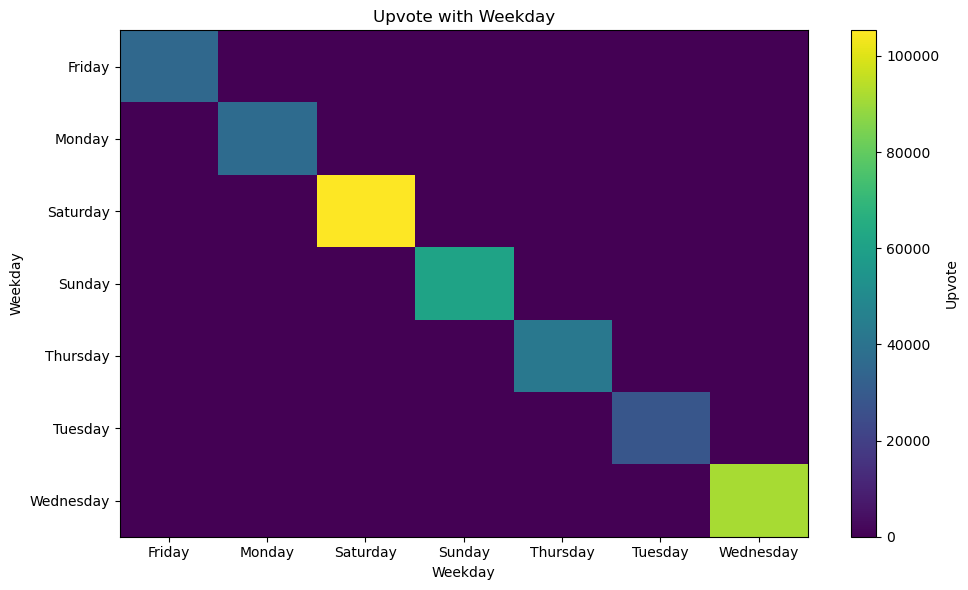

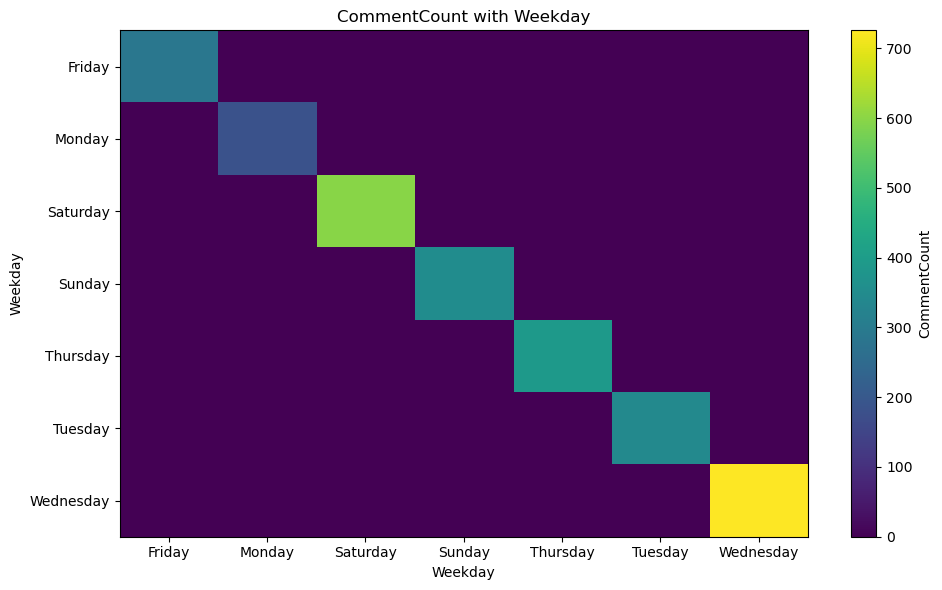

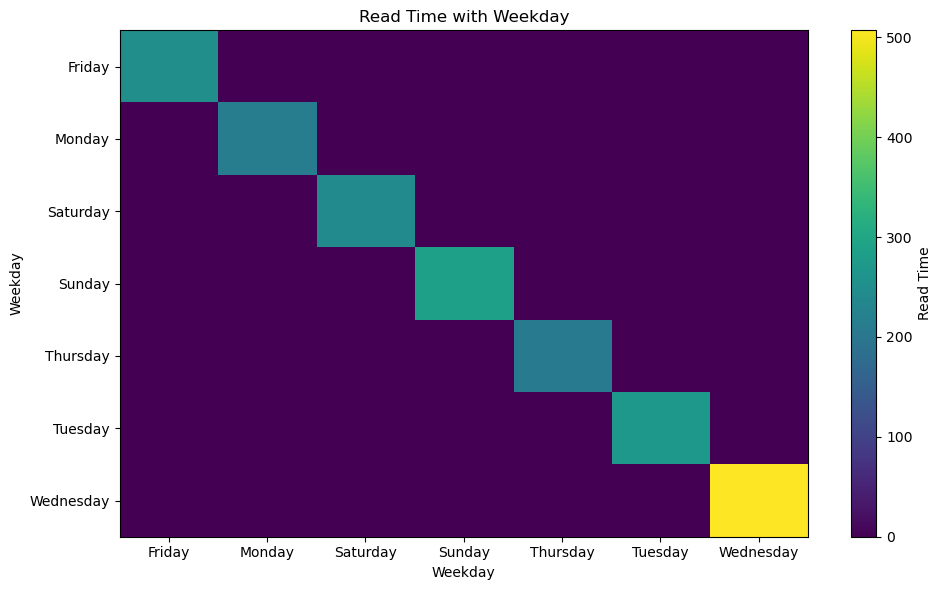

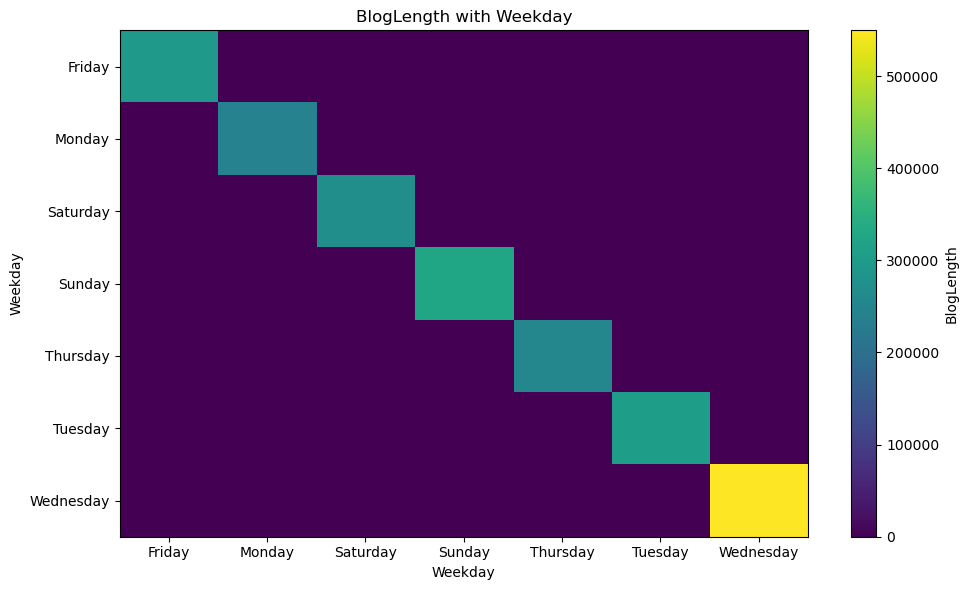

In [28]:
for cols in numeric_columns:
    relationship_with_time('Weekday',cols)

### Key Insights:
- **Peak Engagement on Wednesdays**: The concentration of upvotes and comments on Wednesdays indicates a notable trend associated with this particular day of the week.
- **Optimal Timing for Audience Engagement**: Wednesdays may align with optimal timing for audience engagement, capturing the attention of readers who are actively seeking content mid-week.
- **Mid-Week Content Consumption**: Mid-week tends to be a period when individuals have settled into their routines but are still receptive to new information and entertainment. This behavior pattern could contribute to the higher engagement observed on Wednesdays.
- **Consistency in Publishing Schedule**: Establishing a consistent publishing schedule, with a focus on Wednesdays, fosters audience anticipation and habit formation, driving sustained engagement over time.

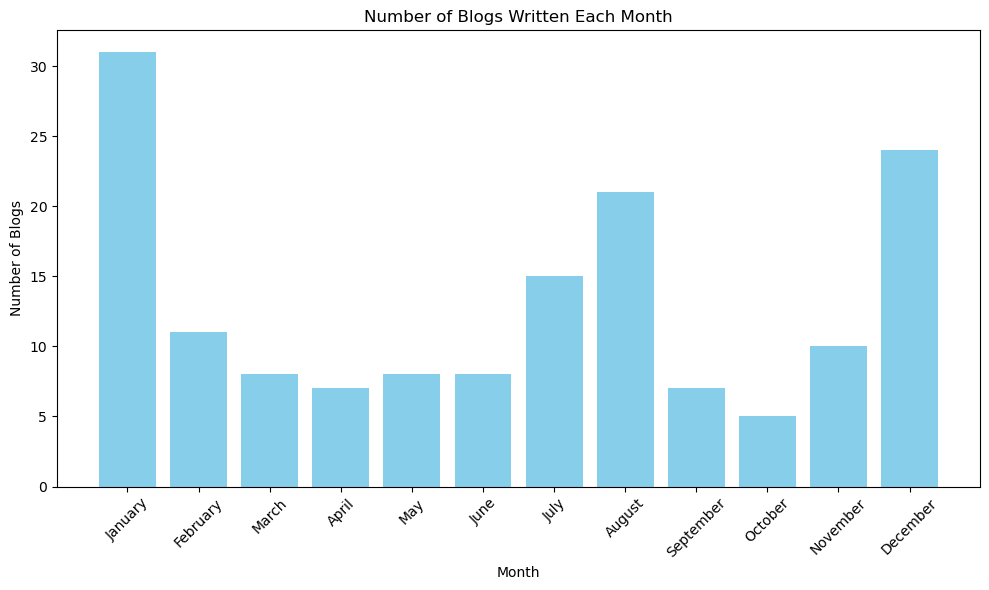

In [29]:
month_df = pd.DataFrame(df["Month"].value_counts())
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
month_df = month_df.reindex(months).reset_index()
distribution_of_time('Month',month_df)

- The data reveals that the majority of blogs are written during the months of December and January. This observation could be attributed to the holiday season, particularly Christmas Eve and New Year.

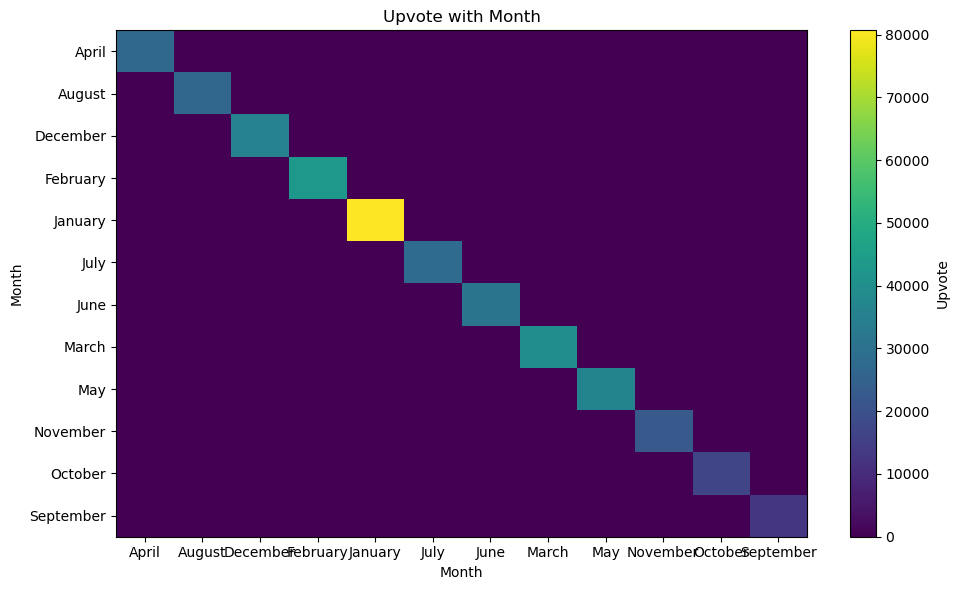

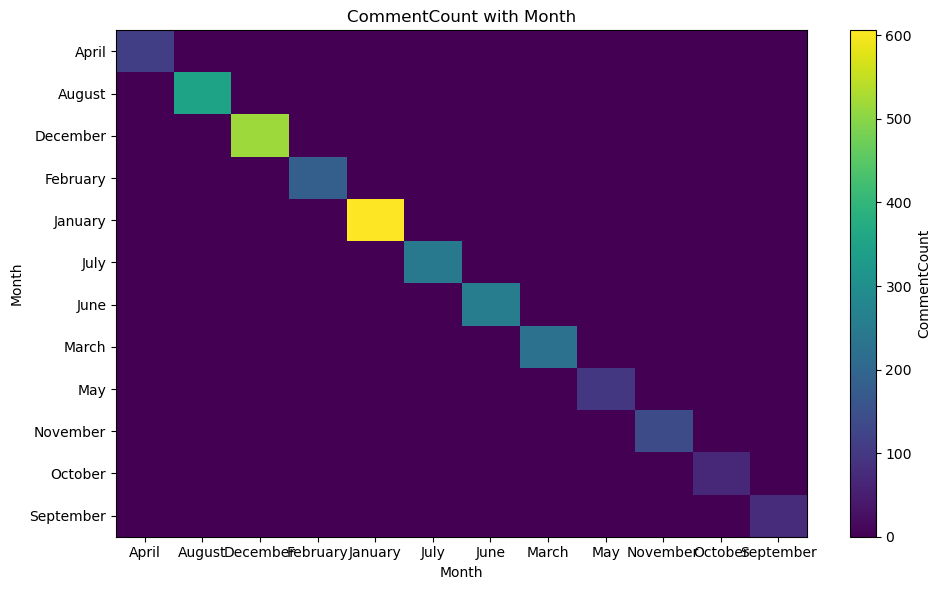

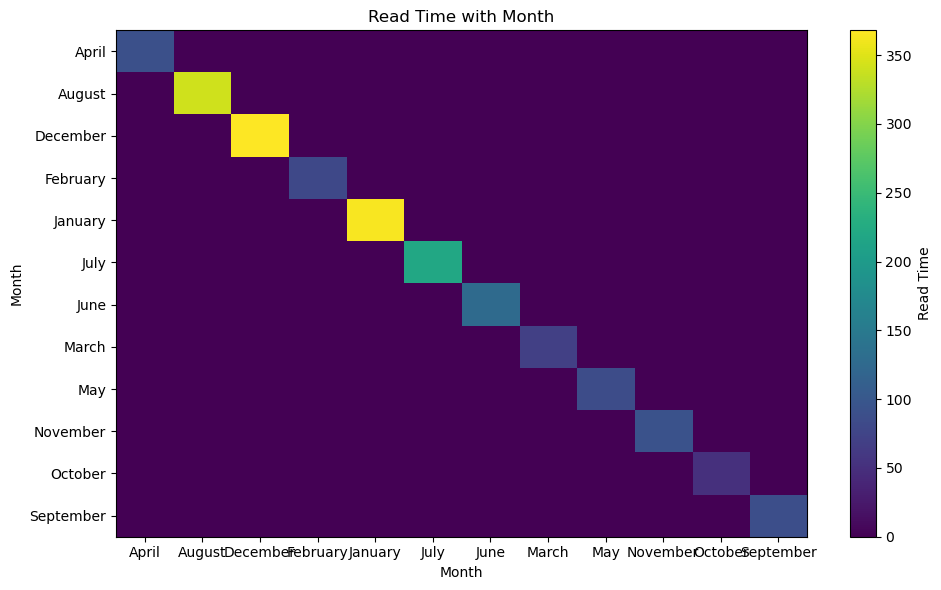

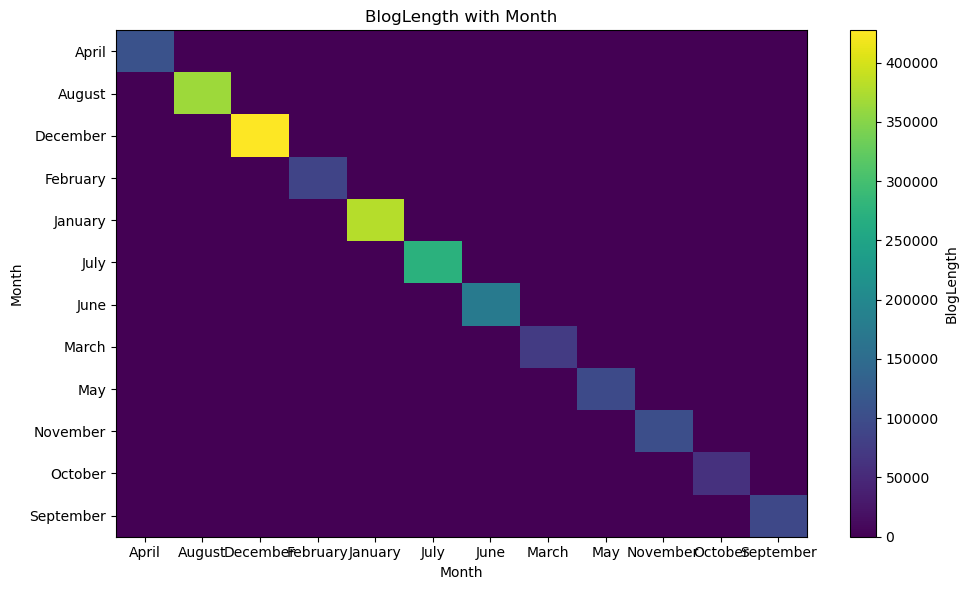

In [30]:
for cols in numeric_columns:
    relationship_with_time('Month',cols)

## Analysis of Upvote and Comment Trends Over Months

The data reveals that the most upvotes and comments occur in January and December. This observation aligns with expectations, considering that more blogs are written during these months. However, there could be additional factors contributing to this trend.

### Key Insights:
- **Higher Engagement in January and December**: The correlation between increased upvotes/comments and higher blog activity in January and December suggests a possible relationship between content publication and engagement levels.
- **Holiday Season Influence**: The surge in upvotes and comments during January and December could be attributed to the holiday season. People may have more free time to read and engage with content during these months, leading to higher traffic and interaction.
- **Content Relevance**: The content published during January and December might be particularly relevant or appealing to the audience during the holiday period. The author may focus on creating seasonal or themed content to capture audience interest.
- **Community Engagement**: January and December could also coincide with significant community events or discussions, leading to increased interaction and engagement with the author's content.
- **Long-Term Engagement**: Analyzing the long-term impact of content published in January and December on subsequent engagement levels could provide further insights into the effectiveness of the author's publishing strategy during these months.


## Analysis of Writers Blog Style Over Time

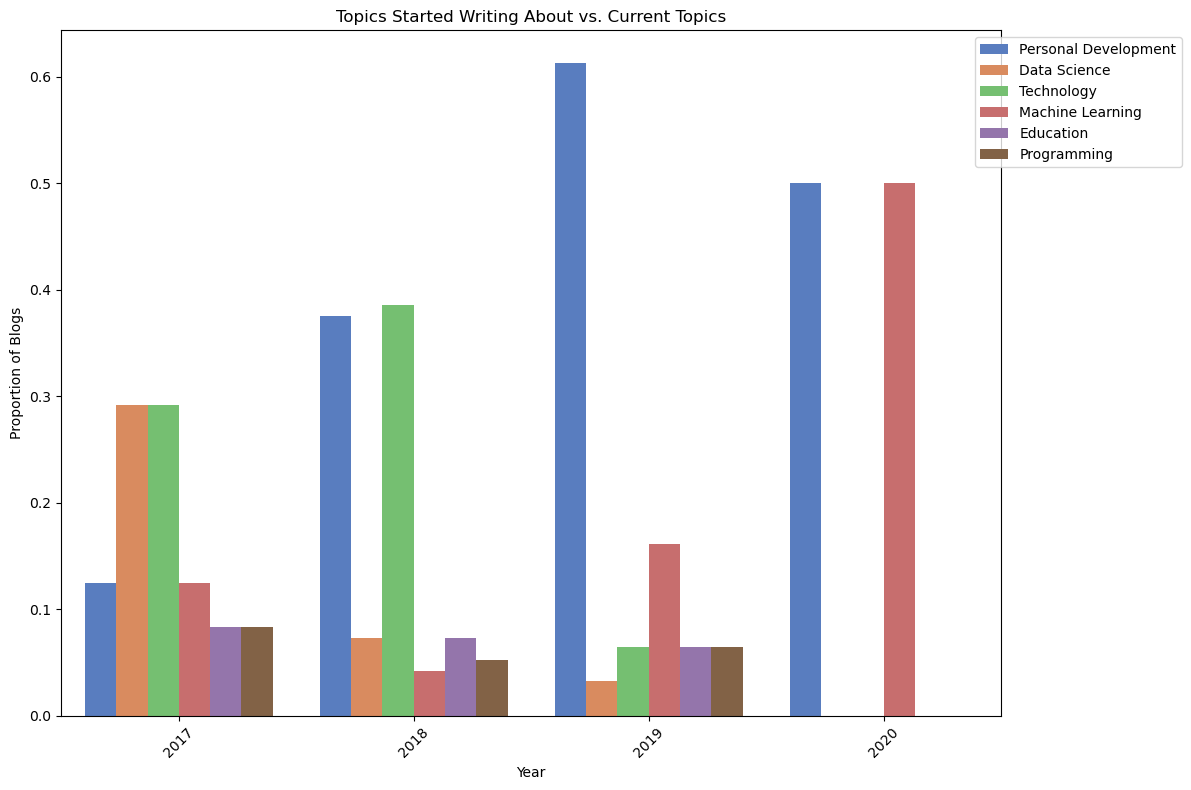

In [31]:
tag_counts = df.groupby(['Year', 'Tag']).size().reset_index(name='Count')

tag_counts['Proportion'] = tag_counts.groupby('Year')['Count'].transform(lambda x: x / x.sum())
plt.figure(figsize=(12, 8))
sns.barplot(data=tag_counts, x='Year', y='Proportion', hue='Tag', palette='muted')
plt.title('Topics Started Writing About vs. Current Topics')
plt.xlabel('Year')
plt.ylabel('Proportion of Blogs')
plt.legend(title=None, loc='upper right', bbox_to_anchor=(1.2, 1)) 
plt.xticks(rotation=45)
plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
plt.legend(handles[:len(unique_labels)], unique_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

In [32]:
def blog_of_categories_each_year(selected_year):
    filtered_df = tag_counts[tag_counts['Year'] == selected_year]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=filtered_df, x='Tag', y='Proportion', hue='Tag', palette='muted')
    plt.title(f'Topics Started Writing About vs. Current Topics in {selected_year}')
    plt.xlabel('Categories')
    plt.ylabel('Number of Blogs of category')
    plt.legend(title=None,loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

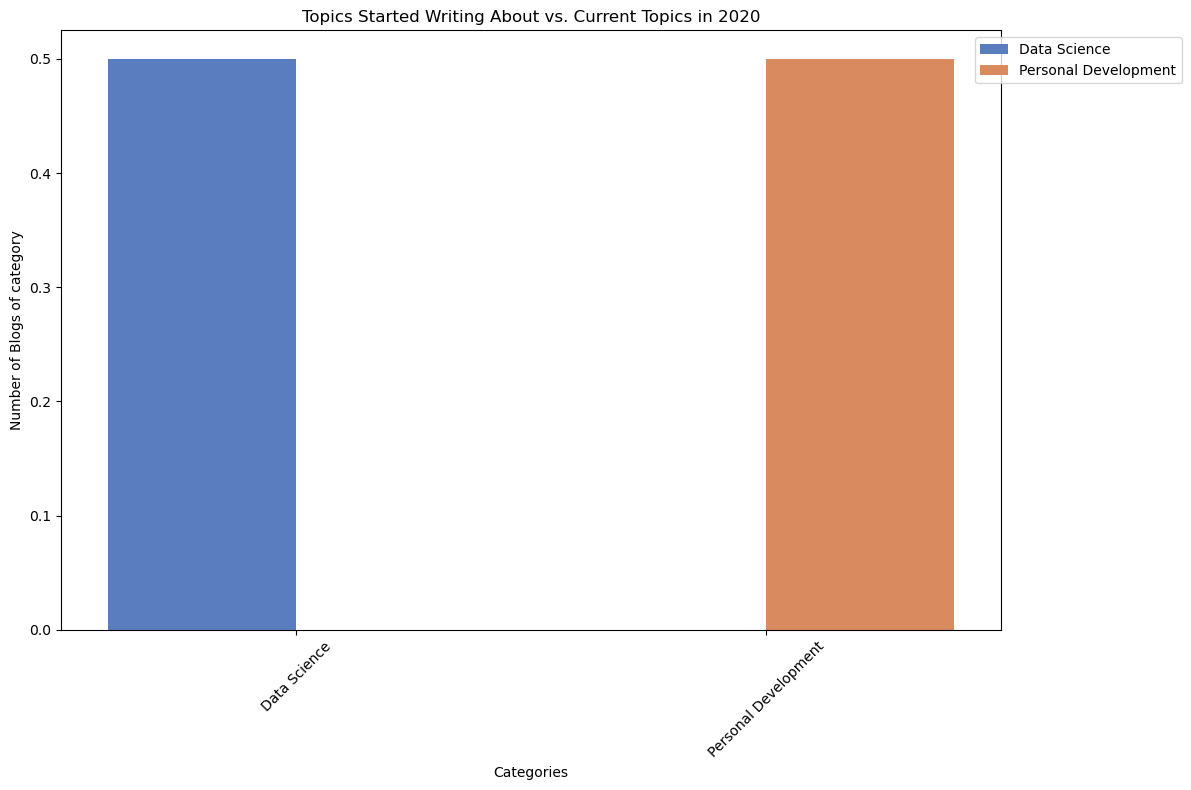

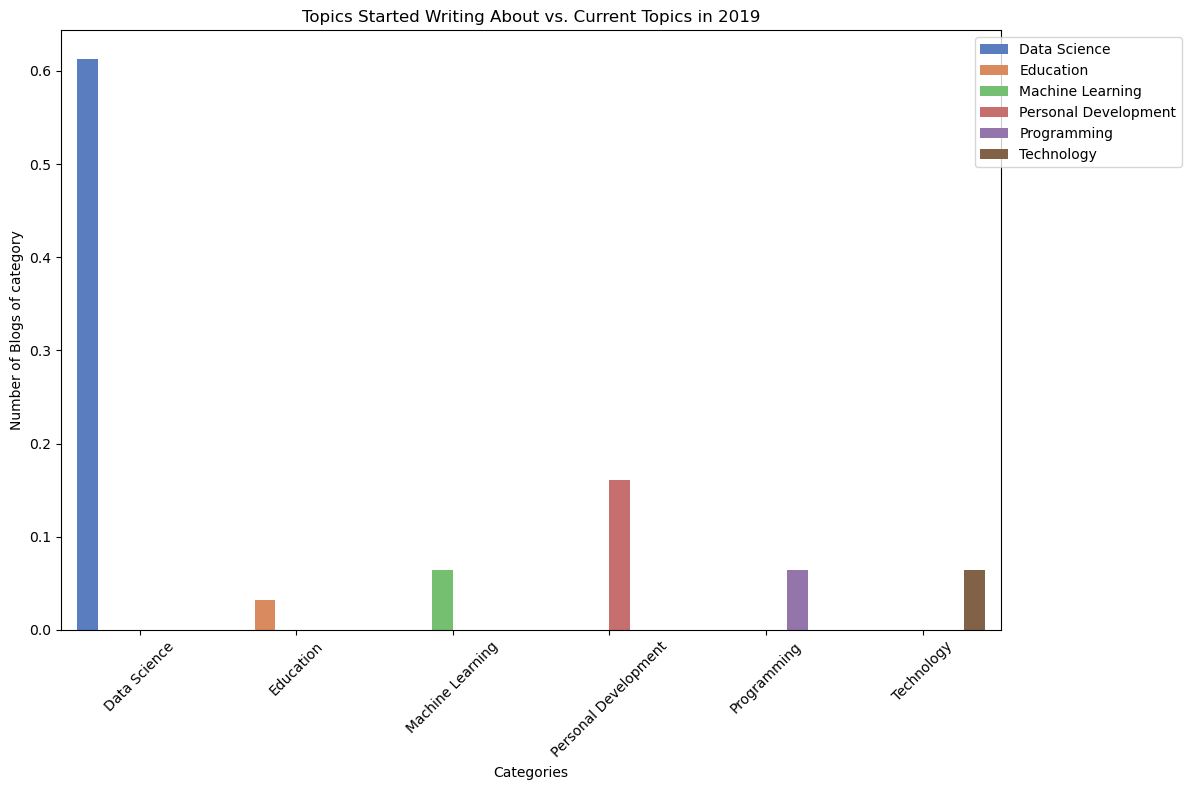

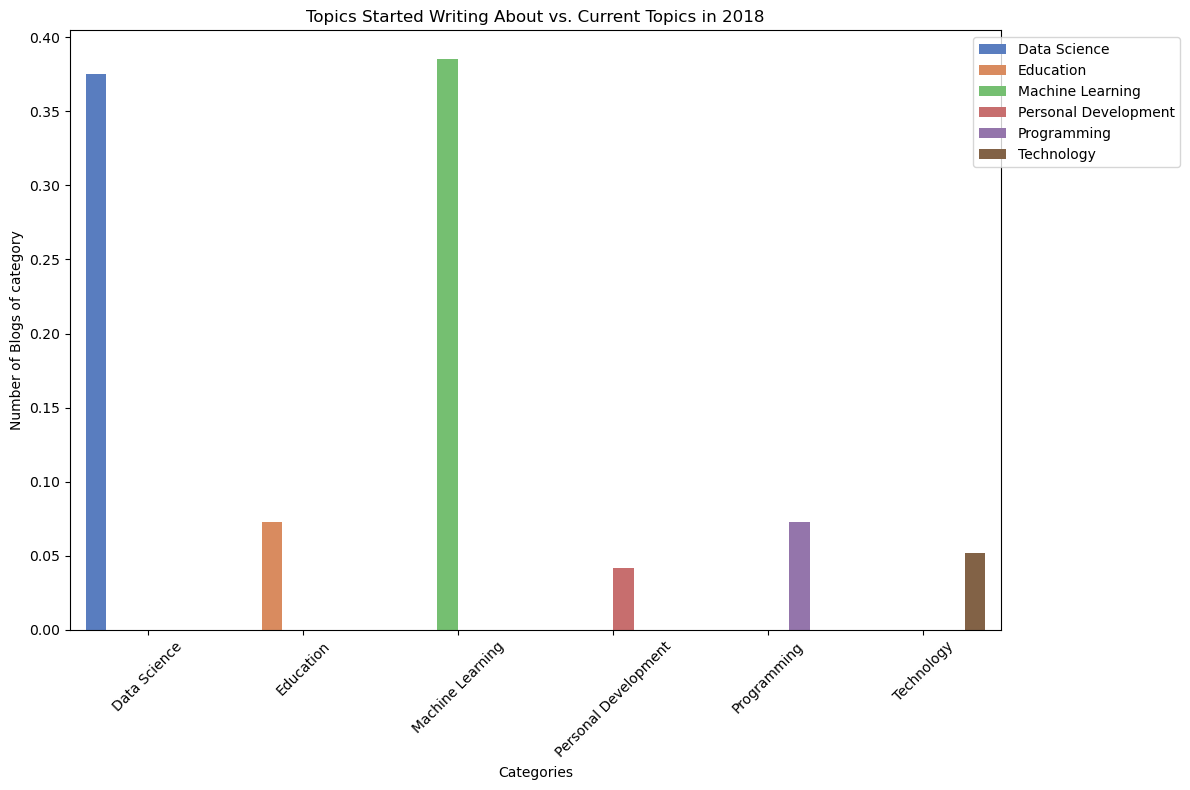

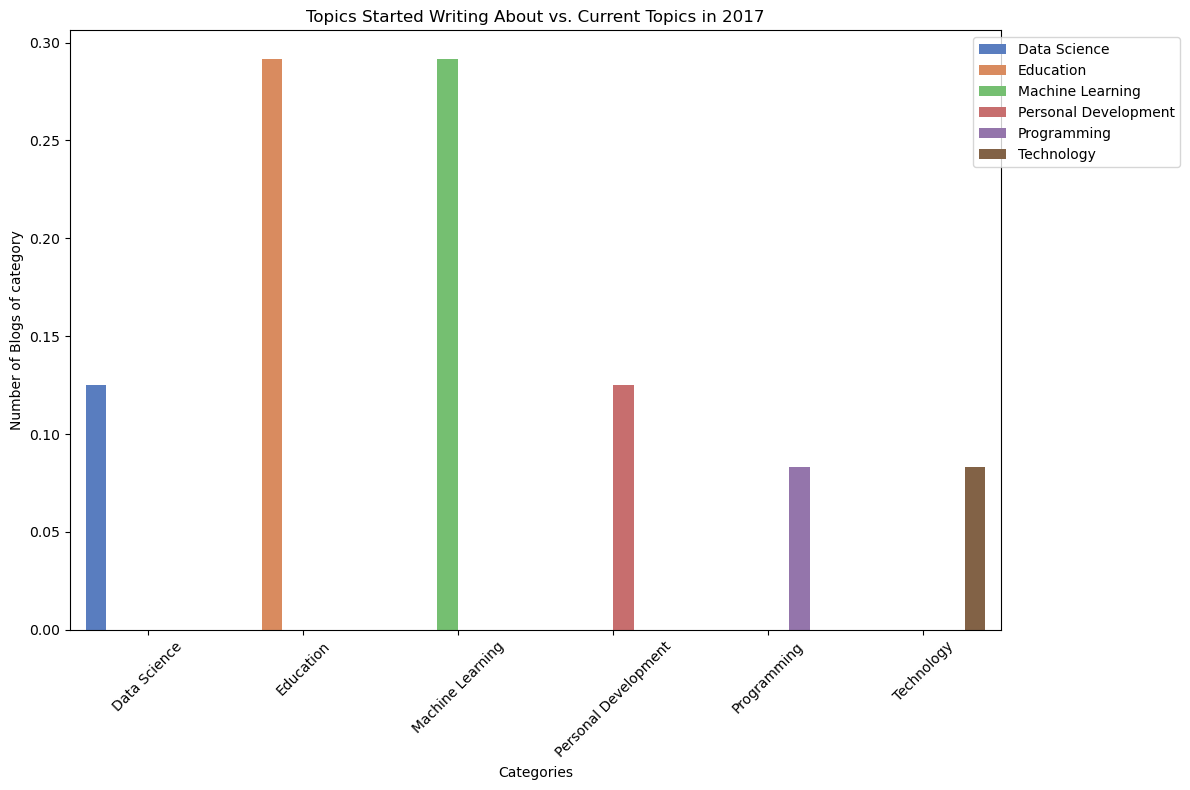

In [33]:
year = df['Year'].unique()
for y in year:
    blog_of_categories_each_year(y)

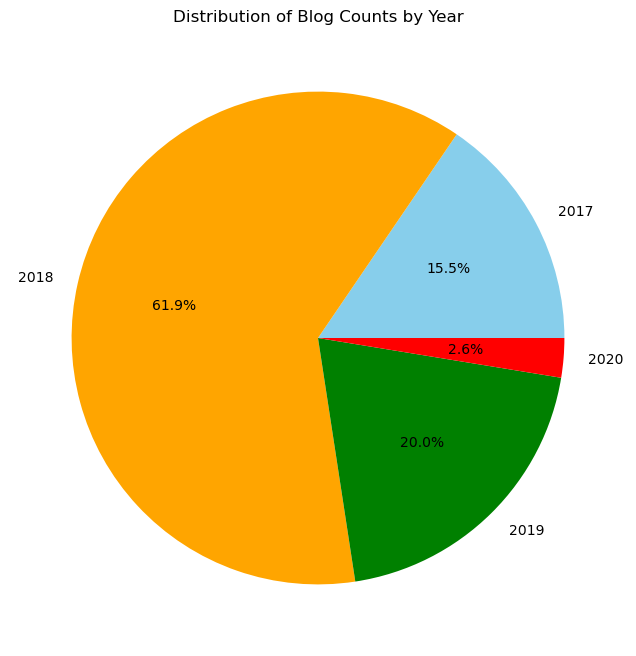

In [34]:
year_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(year_counts.values, labels=year_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Distribution of Blog Counts by Year')
plt.show()

## Analysis of Writer's Blog Topics Over Time

From the data analysis, it's evident that the writer started to cover a variety of topics, with Machine Learning emerging as the dominant theme in 2017. However, as time progressed, Data Science prevailed as the main theme of the writer's blogs.

### Key Insights:
- **Variety of Topics**: Initially, the writer explored various subjects, indicating a broad range of interests and expertise.
- **Dominance of Machine Learning (2017)**: In 2017, Machine Learning emerged as the dominant theme, suggesting a significant focus on this area during that period.
- **Shift to Data Science**: Over time, Data Science became the primary theme, indicating a shift in the writer's focus or evolving interests towards this field.
- **Decrease in Blog Frequency**: There's a noticeable decline in the number of blogs written over time. This decline could be attributed to the writer becoming busier, possibly due to other commitments or increased workload.
- **Quality over Quantity**: The decrease in the number of blogs could signify a shift towards prioritizing quality over quantity. The writer may be investing more time and effort into each blog, resulting in fewer publications.
- **Specialization in Data Science**: The increasing emphasis on Data Science suggests that the writer might have specialized in this field or found it particularly rewarding or relevant to their audience.
- **Evolution of Expertise**: The transition from covering a variety of topics to focusing primarily on Data Science indicates an evolution of the writer's expertise and interests over time.

Overall, the data reflects a journey of exploration, specialization, and adaptation, highlighting the writer's growth and development in their blogging journey.
